## Data Description

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import pickle

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [3]:
df= pd.read_csv(r"abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

### About Columns

1- Sex: Nominal data type (M- MALE, F- FEMALE, I- INFANT)

2- Length: Longest shell measurement(in mm). Continuous data type

3-  Diameter:  perpendicular to length (in mm). Continuous data type

4-Height: with meat in shell (in mm) . Continuous data type

5-Whole Weight: whole abalone (in grams). Continuous data type

6-Shucked Weight: weight of meat (in grams). Continuous data type

7-Viscera Weight: gut weight(after bleeding) (in grams). Continuous data type

8-Shell Weight: after being dried (in grams). Continuous data type 

9-Rings: +1.5 gives the age in years. integer data type  

In [5]:
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

## EDA

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Data has no null values

In [7]:
df.shape

(4177, 9)

No. of rows= 4177, 
No. of columns= 9

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(4177, 9)

No Duplicate values in data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB


#### Relationship between Features and label

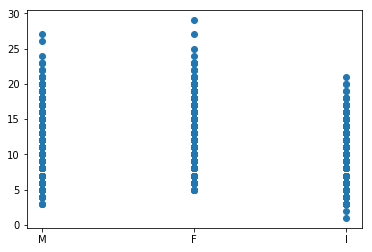

In [10]:
plt.scatter(x="Sex",y="Rings",data=df)

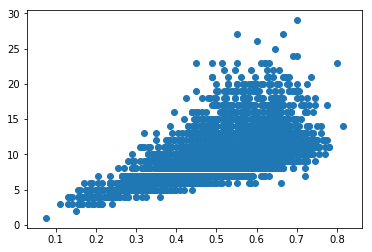

In [11]:
plt.scatter(x="Length",y="Rings",data=df)

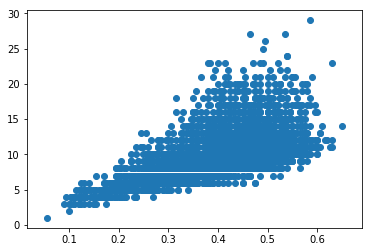

In [12]:
plt.scatter(x="Diameter",y="Rings",data=df)

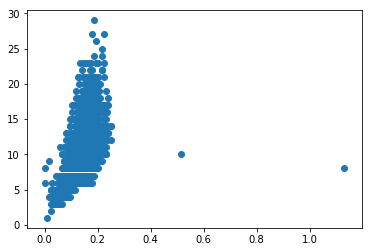

In [13]:
plt.scatter(x="Height",y="Rings",data=df)

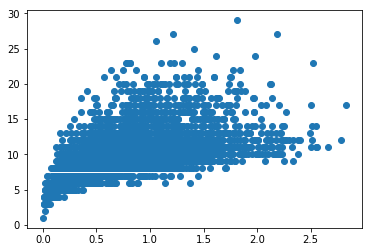

In [14]:
plt.scatter(x="Whole weight",y="Rings",data=df)

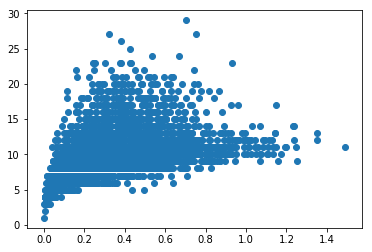

In [15]:
plt.scatter(x="Shucked weight",y="Rings",data=df)

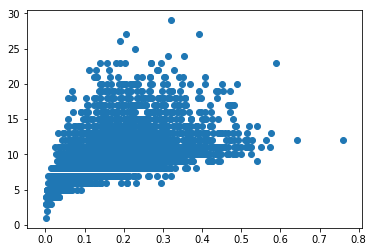

In [16]:
plt.scatter(x="Viscera weight",y="Rings",data=df)

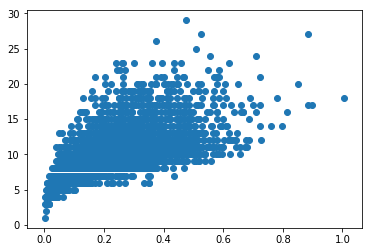

In [17]:
plt.scatter(x="Shell weight",y="Rings",data=df)

### Describing Data

In [18]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


From above we observe the mean, Standard Deviation, median, quartiles, min value and max value for each feature. "Sex" is nominal data and hence is not described above

No. of rows= 4177


No. of columns= 9

#### Length
Mean= 0.52399, std= 0.120093, min= 0.075, max= 0.815

#### Diameter
Mean= 0.407881, std= 0.09924, min= 0.055, max= 0.65

#### Height
Mean= 0.139516, std= 0.041827, min= 0, max= 1.13

#### Whole weight
Mean= 0.828742, std= 0.490389, min= 0.002, max= 2.8255

#### Diameter
Mean= 0.407881, std= 0.09924, min= 0.055, max= 0.65

#### Diameter
Mean= 0.407881, std= 0.09924, min= 0.055, max= 0.65

#### Shucked weight
Mean= 0.359367, std= 0.221963, min= 0.001, max= 1.488

#### Shell weight
Mean= 0.238831, std= 0.139203, min= 0.0015, max= 1

#### Encoding Sex columns in out data set

In [19]:
## Using Label Encoder
lab_enc=LabelEncoder()
df1= lab_enc.fit_transform(df["Sex"])
df["Sex"]=df1
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Correlation

In [20]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


#### Plotting of heatmap

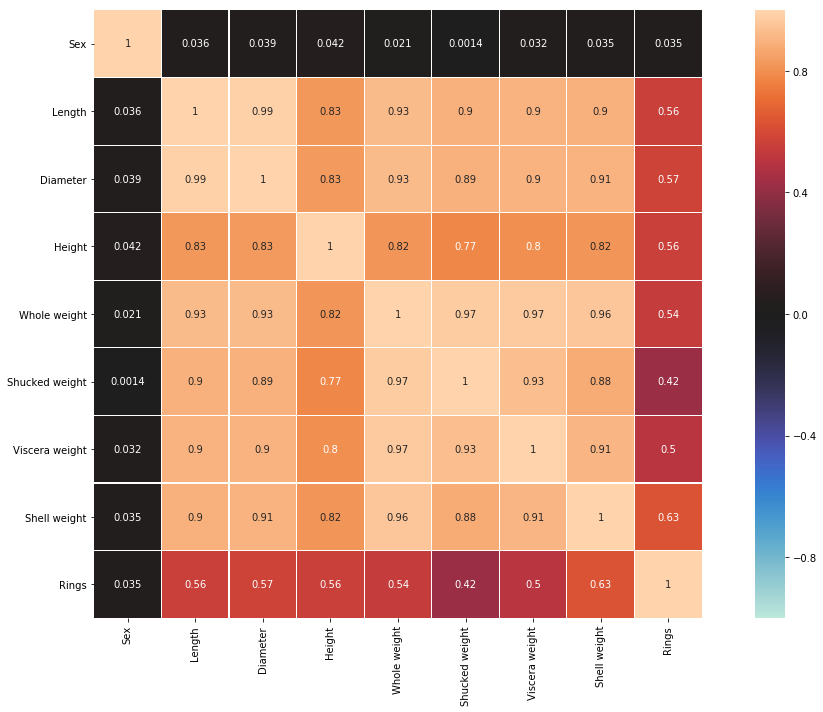

In [21]:
df_corr= df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

We observe multicollinearity in features and also high correlation between features and labels. Sex has 3.5% negative correlation, Length has 56% positive correlation, Diameter has 57% positive correlation, Height has 56% positive correlation, Whole weight has 54% positive correlation, Shucked weight has 42% positive correlation, Viscera weight has 50% positive correlation, Shell weight has 63% positive correlation 

We also observe multicolinearity here in features like "Length" and "Diameter" are 99% correlated "Viscera Weight" and "Whole Weight" are 96% correlated

Max Correlation : Shell Weight

Min Correlation : Sex

### Check for Outliers

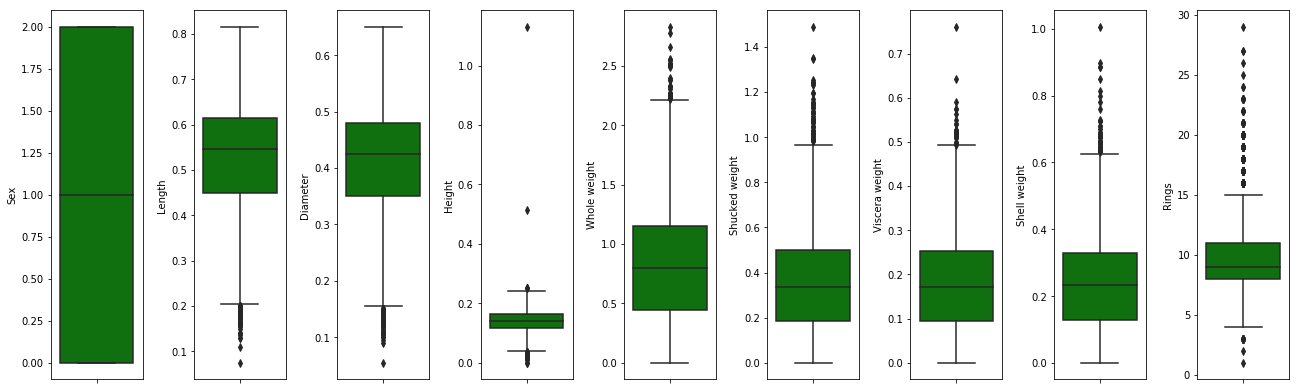

In [22]:
collist=df.columns.values
plt.figure(figsize=(40,80))
for i in range(0,len(collist)):
    plt.subplot(15,20,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

From above plot we observe that "Height" has less number of outliers whereas, all other columns "Length", "Diameter", "Height" , "Whole weight", "Shucked weight", "Viscera weight" and "Shell weight" have more outliers. "Sex" being categorical data has no outliers.

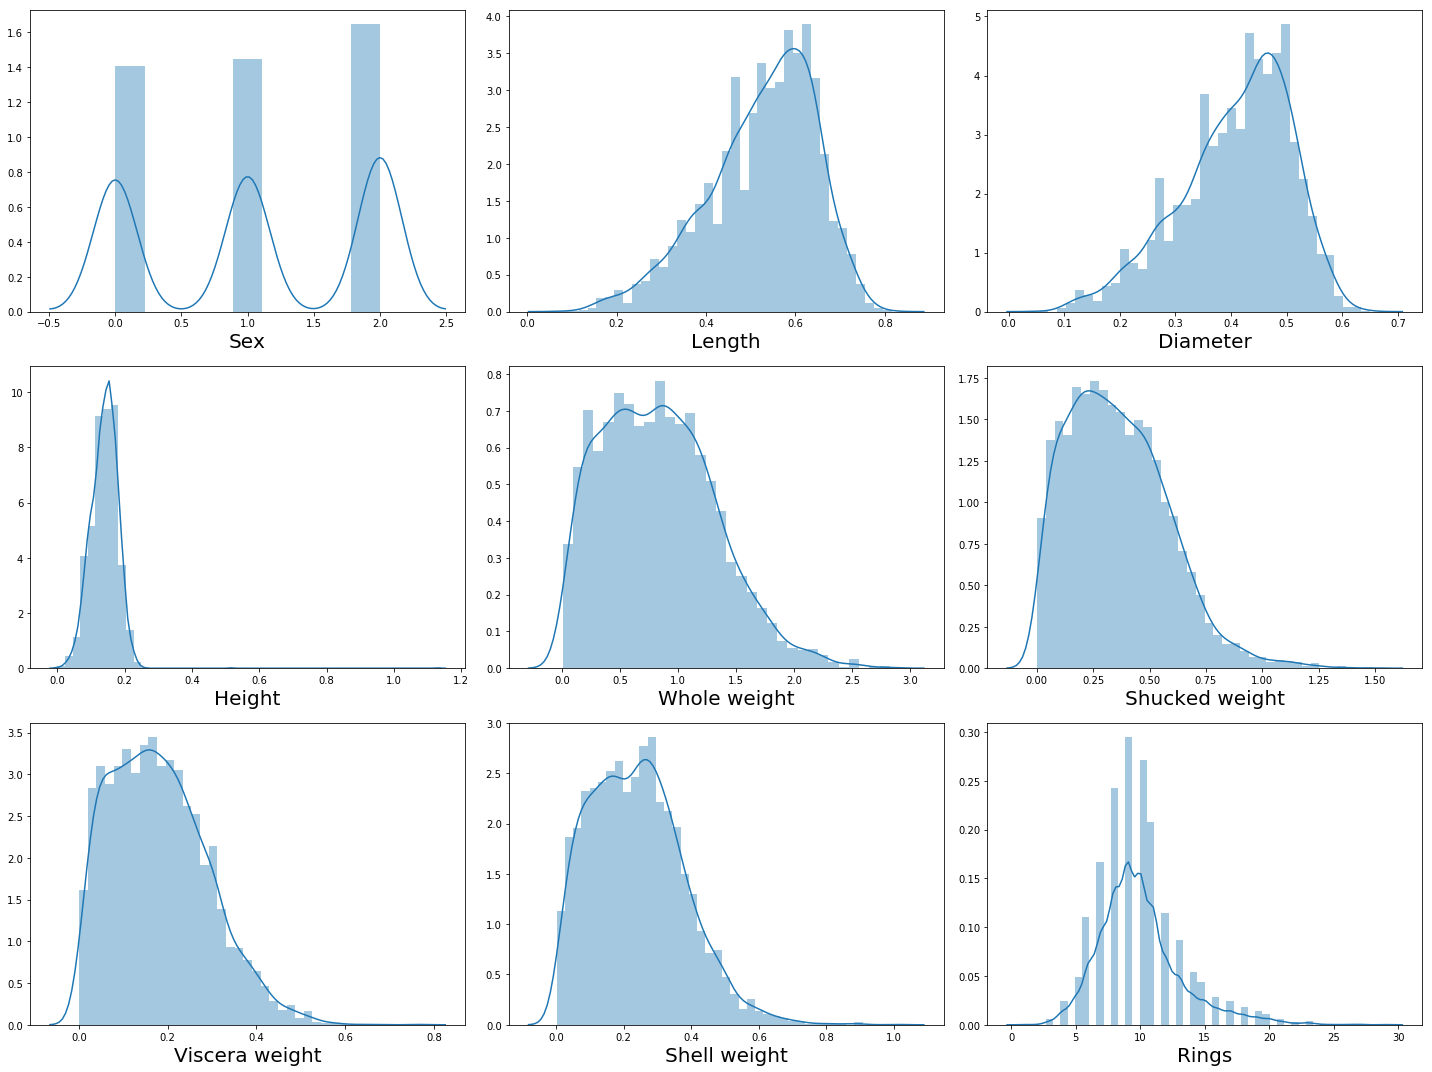

In [23]:
## checking for Normal Distribution of curve
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

We observe that all data in above graphs is not normalised. Therefore Normal Distribution Curve here are irrelevant there.

## Data Cleaning

In [24]:
from scipy import stats
z=np.abs(stats.zscore(df))
index=(np.where(z>3)[0])
df_new=df.drop(df.index[index])
df_new.shape

(4027, 9)

#### Percentage of data loss

In [25]:
perc= ((4177-4027)/4177)*100
print("Percentage of data loss= ",perc)

Percentage of data loss=  3.5910940866650707


### Check for skewness

In [26]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [27]:
x.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

We observe skewness in Length and Diameter feature so we'lluse power transform

In [28]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [29]:
## Scaling data
scale= StandardScaler()
x_scaled=scale.fit_transform(x)

In [30]:
# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=355)

#### Linear Regression

In [31]:
lm= LinearRegression()
lm.fit(x_train,y_train)
y_pred= lm.predict(x_test)
lm.score(x_test,y_test)

0.5210627215193431

#### KNeighbors Regressor

In [32]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
knn.score(x_test,y_test)

0.5214008887097663

#### DecisionTree Regression

In [33]:
clf= DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)
clf.score(x_test,y_test)

0.20991313482434326

#### Support Vector Regression

In [34]:
svr= SVR()
svr.fit(x_train,y_train)
y_pred= svr.predict(x_test)
svr.score(x_test,y_test)

0.5639691744638611

### Model Evaluation

Computing Cross Validation Score for each model

#### Linear Regression

In [35]:
cross_val_score(lm,x_train, y_train,cv=5).mean()

0.5018151657092987

#### KNeighbors Regressor

In [36]:
cross_val_score(knn,x_train, y_train,cv=5).mean()

0.4568890047282387

#### DecisionTree Regression

In [37]:
cross_val_score(clf,x_train, y_train,cv=5).mean()

0.04359679758159818

#### Support Vector Regression

In [38]:
cross_val_score(svr,x_train, y_train,cv=5).mean()

0.5227523452871365

From cross validation Scores We observe linear regression is our best model with least difference between r2 score and cross_val_score

We'll now use Lasso CV to regularize model

In [39]:
lasscv= LassoCV(alphas=None, max_iter=1000, normalize= True)
lasscv.fit(x_train,y_train)
alpha= lasscv.alpha_
lasso_reg= Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.5210645963770411

Since after regularization there is no visiblw change in r2 score we observe our model was not under or overfitting. Now we will continue with tuning our model to achieve better accuracy

### Hyper parametric tuning

In [40]:
lasso_reg= LassoCV()
param={'fit_intercept':[True,False], 'normalize':[True,False],
      'max_iter':[100,1000,500], 'eps':[0.001,0.002,0.003],}
grid_search=GridSearchCV(estimator=lasso_reg, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
print(best_parameter)

{'eps': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'normalize': True}


In [41]:
lasso_reg= LassoCV(eps=0.001,fit_intercept=True, max_iter=1000, normalize=True)
lasso_reg.fit(x_train,y_train)
y_pred= lasso_reg.predict(x_test)
print("R2 Score= ",r2_score(y_test,y_pred))

R2 Score=  0.5210453911443198


In [42]:
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Mean Squared Error=  4.050195875275644


### Saving Model

In [43]:
filename= "AbaloneCaseStudy.pickle"
pickle.dump(lasso_reg,open(filename,'wb'))